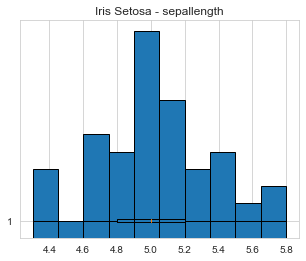

LIF 4.2 UIF 5.8 LOF 3.6 UOF 6.4
Empty DataFrame
Columns: [sepallength, sepalwidth, petallength, petalwidth, class]
Index: []


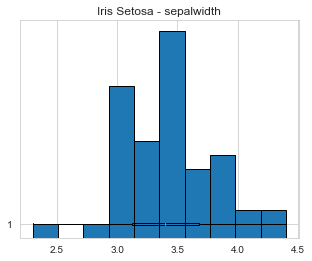

LIF 2.28 UIF 4.52 LOF 1.44 UOF 5.36
Empty DataFrame
Columns: [sepallength, sepalwidth, petallength, petalwidth, class]
Index: []


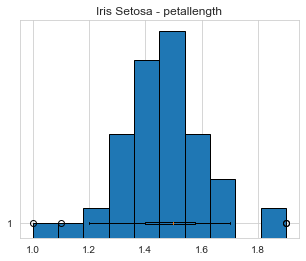

LIF 1.13 UIF 1.85 LOF 0.86 UOF 2.12
    sepallength  sepalwidth  petallength  petalwidth        class
22          4.6         3.6          1.0         0.2  Iris-setosa
13          4.3         3.0          1.1         0.1  Iris-setosa
24          4.8         3.4          1.9         0.2  Iris-setosa
44          5.1         3.8          1.9         0.4  Iris-setosa


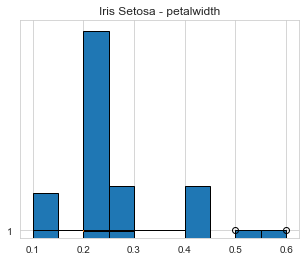

LIF 0.05 UIF 0.45 LOF -0.1 UOF 0.6
    sepallength  sepalwidth  petallength  petalwidth        class
23          5.1         3.3          1.7         0.5  Iris-setosa
43          5.0         3.5          1.6         0.6  Iris-setosa


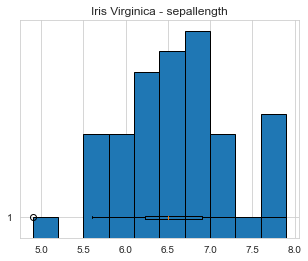

LIF 5.23 UIF 7.91 LOF 4.22 UOF 8.91
     sepallength  sepalwidth  petallength  petalwidth           class
106          4.9         2.5          4.5         1.7  Iris-virginica


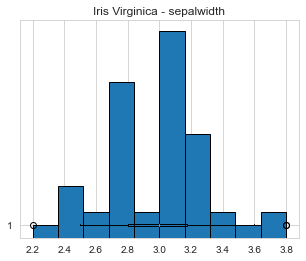

LIF 2.23 UIF 3.75 LOF 1.66 UOF 4.32
     sepallength  sepalwidth  petallength  petalwidth           class
119          6.0         2.2          5.0         1.5  Iris-virginica
117          7.7         3.8          6.7         2.2  Iris-virginica
131          7.9         3.8          6.4         2.0  Iris-virginica


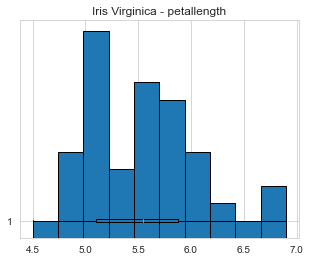

LIF 3.93 UIF 7.05 LOF 2.76 UOF 8.22
Empty DataFrame
Columns: [sepallength, sepalwidth, petallength, petalwidth, class]
Index: []


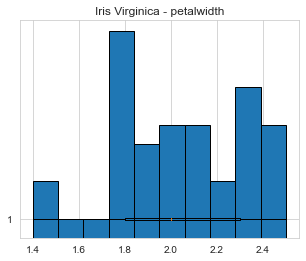

LIF 1.05 UIF 3.05 LOF 0.3 UOF 3.8
Empty DataFrame
Columns: [sepallength, sepalwidth, petallength, petalwidth, class]
Index: []


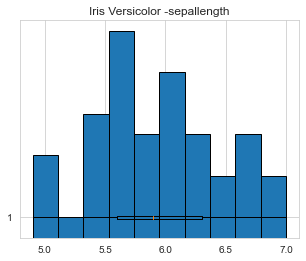

LIF 4.55 UIF 7.35 LOF 3.5 UOF 8.4
Empty DataFrame
Columns: [sepallength, sepalwidth, petallength, petalwidth, class]
Index: []


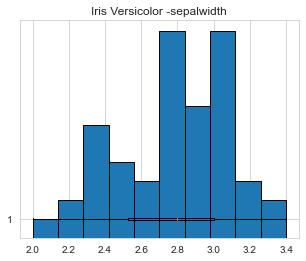

LIF 1.8 UIF 3.72 LOF 1.08 UOF 4.44
Empty DataFrame
Columns: [sepallength, sepalwidth, petallength, petalwidth, class]
Index: []


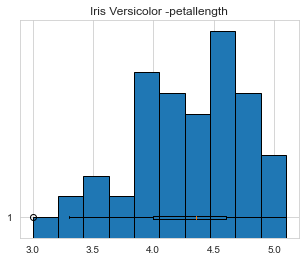

LIF 3.1 UIF 5.5 LOF 2.2 UOF 6.4
Empty DataFrame
Columns: [sepallength, sepalwidth, petallength, petalwidth, class]
Index: []


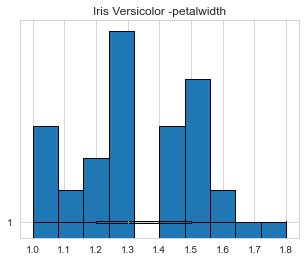

LIF 0.75 UIF 1.95 LOF 0.3 UOF 2.4
Empty DataFrame
Columns: [sepallength, sepalwidth, petallength, petalwidth, class]
Index: []
------- Outliers encontrados usando DBSCAN  -----------
DBSCAN(eps=0.7, min_samples=19, n_jobs=1)
Counter({1: 85, 0: 50, -1: 15})
     Alto - Sepalo  Ancho - Sepalo  Alto - Pétalo  Ancho - Pétalo
57             4.9             2.4            3.3             1.0
60             5.0             2.0            3.5             1.0
93             5.0             2.3            3.3             1.0
98             5.1             2.5            3.0             1.1
105            7.6             3.0            6.6             2.1
106            4.9             2.5            4.5             1.7
107            7.3             2.9            6.3             1.8
109            7.2             3.6            6.1             2.5
117            7.7             3.8            6.7             2.2
118            7.7             2.6            6.9             2.3
122            7.

Text(0.5, 1.0, 'Comparativa de detección de Outliers usando DBSCAN')

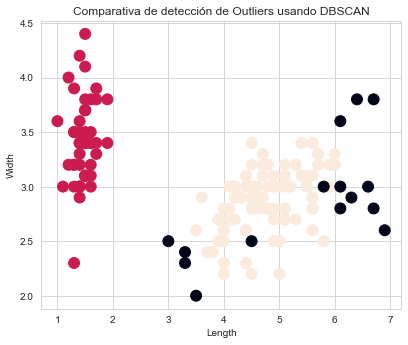

In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams
import numpy as np 
import sklearn
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter

iris = pd.read_csv('iris.csv')
iris = iris.astype({"petallength": np.float, "petalwidth": np.float, "sepallength": np.float, "sepalwidth": np.float}) #standardizing types to float
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

#sb.pairplot(dataset, hue="class")
#plt.show()

# Analisis de datos - Deteccion de outliers para los atributos de las especies Iris sp 
# usando gráficos de caja y bigote 

def histograma_setosa(atrib):
    plt.title('Iris Setosa - ' + atrib)
    setosa = iris.loc[iris["class"] == "Iris-setosa"]
    plt.hist(setosa[atrib], edgecolor = "black", linewidth=1)
    plt.boxplot(setosa[atrib],vert=False)
    plt.show()
    Q1 = round(float(setosa[atrib].quantile(0.25)),2)
    Q3 = round(float(setosa[atrib].quantile(0.75)),2)
    IQ = round(float(Q3 - Q1),2)
    Med = float(setosa[atrib].median())
    Min = float(setosa[atrib].min())
    Max = float(setosa[atrib].max())
    LIF = round(float(Q1 - (1.5*IQ)),2)
    UIF = round(float(Q3 + (1.5*IQ)),2)
    LOF = round(float(Q1 - (3.0*IQ)),2)
    UOF = round(float(Q3 + (3.0*IQ)),2)
    print("LIF", LIF, "UIF", UIF, "LOF", LOF, "UOF", UOF)
    escalar_outliers = (setosa[atrib] < LIF) | (setosa[atrib] > UIF)
    outliers = setosa[escalar_outliers]
    print (outliers.sort_values(index))

def histograma_virginica(atrib):
    plt.title('Iris Virginica - ' + atrib)
    virginica = iris.loc[iris["class"] == "Iris-virginica"]
    plt.hist(virginica[atrib], edgecolor = "black", linewidth=1)
    plt.boxplot(virginica[atrib],vert=False)
    plt.show()
    Q1 = round(float(virginica[atrib].quantile(0.25)),2)
    Q3 = round(float(virginica[atrib].quantile(0.75)),2)
    IQ = round(float(Q3 - Q1),2)
    Med = float(virginica[atrib].median())
    Min = float(virginica[atrib].min())
    Max = float(virginica[atrib].max())
    LIF = round(float(Q1 - (1.5*IQ)),2)
    UIF = round(float(Q3 + (1.5*IQ)),2)
    LOF = round(float(Q1 - (3.0*IQ)),2)
    UOF = round(float(Q3 + (3.0*IQ)),2)

    print("LIF", LIF, "UIF", UIF, "LOF", LOF, "UOF", UOF)
    escalar_outliers = (virginica[atrib] < LIF) | (virginica[atrib] > UIF)
    outliers = virginica[escalar_outliers]
    print (outliers.sort_values(atrib))

def histograma_versicolor(atrib):
    plt.title('Iris Versicolor -' + atrib)
    versicolor = iris.loc[iris["class"] == "Iris-versicolor"]
    plt.hist(versicolor[atrib], edgecolor = "black", linewidth=1)
    plt.boxplot(versicolor[atrib],vert=False)
    plt.show()
    Q1 = round(float(versicolor[atrib].quantile(0.25)),2)
    Q3 = round(float(versicolor[atrib].quantile(0.75)),2)
    IQ = round(float(Q3 - Q1),2)
    Med = float(versicolor[atrib].median())
    Min = float(versicolor[atrib].min())
    Max = float(versicolor[atrib].max())
    LIF = round(float(Q1 - (1.5*IQ)),2)
    UIF = round(float(Q3 + (1.5*IQ)),2)
    LOF = round(float(Q1 - (3.0*IQ)),2)
    UOF = round(float(Q3 + (3.0*IQ)),2)

    print("LIF", LIF, "UIF", UIF, "LOF", LOF, "UOF", UOF)
    escalar_outliers = (versicolor[atrib] <= LIF) & (versicolor[atrib] > UIF)
    outliers = versicolor[escalar_outliers]
    print (outliers.sort_values(atrib))

histograma_setosa("sepallength")
histograma_setosa("sepalwidth")
histograma_setosa("petallength")
histograma_setosa("petalwidth")

histograma_virginica("sepallength")
histograma_virginica("sepalwidth")
histograma_virginica("petallength")
histograma_virginica("petalwidth")

histograma_versicolor("sepallength")
histograma_versicolor("sepalwidth")
histograma_versicolor("petallength")
histograma_versicolor("petalwidth")


iris.columns=['Alto - Sepalo', 'Ancho - Sepalo', 'Alto - Pétalo', 'Ancho - Pétalo', 'Especie']
data = iris.iloc[:,0:4]
target = iris.iloc[:,4]

#labels = np.array(iris['class'])
model= DBSCAN(eps=0.7, min_samples=19, leaf_size=30, metric='euclidean', algorithm='auto', n_jobs=1, p=None).fit(data)

print('------- Outliers encontrados usando DBSCAN  -----------')
print(model)
outliers_df = pd.DataFrame(data)
print (Counter(model.labels_))
print (outliers_df[model.labels_==-1])

fig = plt.figure()
ax = fig.add_axes([.1,.1, 1,1])
colors = model.labels_
ax.scatter(data.iloc[:,2].values, data.iloc[:,1].values, c=colors, s=120)
ax.set_xlabel('Length')
ax.set_ylabel('Width')
plt.title('Comparativa de detección de Outliers usando DBSCAN')